# Introduction of the Dataset and Analysis Plan

### Structure of the dataset

We have a couple of options to choose from with datasets:
    - alldata.csv
    - 15 different states csv's
    
Ideally, we would like to see all of them in one because our plan is to answer these questions:

- How many job ads fit the Data Analyst skillset?
- Which are the top employers by number of job ads?
- What's the number of job ads which has salary information vs do not have salary information? 


We concluded 
- that we cannot define who was hired because we don't know the end result of the hiring process
- that we might miss some data because the same tasks, skills, positions are expressed differently


We will look at the datasets' statistics, datatypes, missing and duplicated values as well as visually assess it to define cleaning steps.


**Columns**

position: 

company: 

description: 

reviews: 

location: 


## Assessment

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [87]:
df = pd.read_csv('alldata.csv')

In [88]:
# assess shape
df.shape

(6964, 5)

In [89]:
# assess first 20 rows 
df.head(20)

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA 30318"
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA 30318"
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA"
8,Analyst - CIB Credit Research,SunTrust,Works closely with senior CIB professionals. P...,3343.0,"Atlanta, GA"
9,Senior Associate - Cognitive Data Scientist Na...,KPMG,Known for being a great place to work and buil...,4494.0,"Atlanta, GA 30338"


In [90]:
# assess last 20 rows 
df.tail(20)

,position,company,description,reviews,location
6944,"Staff Data Scientist, Search/Online Grocery",Walmart eCommerce,Position Description\nIn this role you will\nA...,141.0,"Sunnyvale, CA"
6945,"Machine Learning Specialist, Trust and Safety",Google,Google's brand is only as strong as our users'...,2474.0,"Sunnyvale, CA"
6946,Research Scientist,Amazon.com,Job Description\nAlexa is the Amazon cloud ser...,25907.0,"Sunnyvale, CA"
6947,Applied Machine Learning Scientist,Amazon.com,Job Description\nExternal job description\nAma...,25907.0,"Sunnyvale, CA"
6948,Scientist,Microsoft,We are the Azure Big Data teams part of the C+...,4618.0,"Sunnyvale, CA"
6949,Systems software Performance Data Scientist Su...,Alibaba,We are the System Performance Team of Alibaba ...,15.0,"Sunnyvale, CA"
6950,Applied Scientist - Alexa Engine,Amazon.com,Job Description\nInterested in making the ‘Ale...,25907.0,"Sunnyvale, CA"
6951,Lead Data Scientist - NLP,TARGET,Description:\n\nAbout This Opportunity\nJoin t...,33275.0,"Sunnyvale, CA"
6952,Image processing Deep learning Research Scientist,Whiterabbit.ai,Whiterabbit.ai is a leading venture-backed sta...,NaN,"Sunnyvale, CA 94085"
6953,"Machine Learning Scientist, Amazon Alexa",Amazon.com,Job Description\nAmazon is looking for a passi...,25907.0,"Sunnyvale, CA"


In [91]:
# assess dtypes of columns
df.dtypes

position        object
company         object
description     object
reviews        float64
location        object
dtype: object

In [92]:
# assess statistics of the dataset
df.describe()

,reviews
count,5326.000000
mean,3179.089185
std,8448.515056
min,2.000000
25%,27.000000
50%,230.000000
75%,1578.000000
max,148114.000000


In [93]:
# assess column non-null values set to see which column has missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


In [94]:
# assess df's null values
df.isnull().sum()

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

In [95]:
# assess df's duplicated values
sum(df.duplicated())

10

In [96]:
# assess frequency and list of values in different columns
df['position'].value_counts()

Data Scientist                                                351
Senior Data Scientist                                          96
Research Analyst                                               64
Data Engineer                                                  60
Machine Learning Engineer                                      56
                                                             ... 
Research Informatics Analyst                                    1
Client Support Specialist SF East                               1
Advanced Analytics Consultant                                   1
Project Engineer II-Mechanical, New Business Lead (663390)      1
Corporate Investment Quantitative Finance Analyst               1
Name: position, Length: 5242, dtype: int64

In [97]:
# assess frequency and list of values in different columns
df['company'].value_counts()

Amazon.com             358
Ball Aerospace         187
Microsoft              137
Google                 134
NYU Langone Health      77
                      ... 
Kintai Therapeutics      1
HD Supply                1
US Cellular              1
Mintel                   1
TechnoGen Inc            1
Name: company, Length: 2213, dtype: int64

In [98]:
# assess frequency and list of values in different columns
df['location'].value_counts()

Seattle, WA             563
New York, NY            508
Cambridge, MA           487
Boston, MA              454
San Francisco, CA       425
                       ... 
New York, NY 10032        1
Chicago, IL 60613         1
Atlanta, GA 30345         1
Brooklyn, NY 11249        1
Washington, DC 20032      1
Name: location, Length: 382, dtype: int64

## Summary of Assesment

- remove duplicates

### Cleaning steps

**Description column: Karina/Lilla**

- Scrape description column for Excel, R, Python, Tableau, Machine Learning, MySQL, SQL, A/B Tests, Data Mining, Data visualisation, (data visualization), Data Cleansing, Data Cleaning, Statistical modeling, Statistical Analysis

- create a column which validates if they are present in the description with a function and returns a True/False value in the column

- Scrape description column for levels: Entry-level, Junior/Associate,  Internship/Intern 

- create a column which validates if one is present in the description with a function and returns a True/False value in the column

- Before dropping the rows we don’t need, we check the position value

- Scrape for: dollars, $, salary 

- create a column which validates if one is present in the description with a function and returns a True/False value in the column

- Check if it's valid



**Position column: Karina/Lilla**

- Relocate seniority level to a different column

- Revisit when we have both new columns from description and position


**Company column:**

- Remember to decide about it at the visualisation phase
(don't need to do the cleaning now, but later:)

- Check for unique values

- Standardise values if we need to (lowercase, spaces->)


**Review column: Neil**

- Drop it completely


**Location column: Neil**

- Check if there are typos
- Check how many zip codes are missing and make a decision to fill them in or not

In [99]:
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [100]:
df = df.drop(['reviews'], axis=1)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   position     6953 non-null   object
 1   company      6953 non-null   object
 2   description  6953 non-null   object
 3   location     6953 non-null   object
dtypes: object(4)
memory usage: 217.8+ KB


In [102]:
df.head()

,position,company,description,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...","Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta, GA"


In [103]:
lst_skills = ['Excel', 'R', 'Python', 'Tableau', 'Machine Learning', 'MySQL', 
              'SQL', 'A/B Tests', 'A/B Testing', 'Data Mining', 'Data visualisation', 'Data Visualization',
              'Data Cleansing', 'Data Cleaning', 'Statistical modeling', 'Statistical Analysis']

In [104]:
df['description_is_data_analytics'] = df['description'].str.contains(" | ".join(lst_skills))

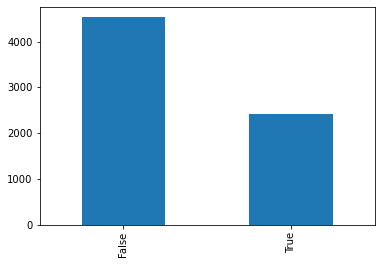

In [105]:
df['description_is_data_analytics'].value_counts().plot(kind="bar");

In [106]:
df.head(2)

,position,company,description,location,description_is_data_analytics
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,"Atlanta, GA 30301",False
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...","Atlanta, GA",False


In [107]:
lst_salary = ['Salary', 'salary']

In [108]:
df['description_has_salary'] = df['description'].str.contains(" | ".join(lst_skills))

In [109]:
df.head()

,position,company,description,location,description_is_data_analytics,description_has_salary
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,"Atlanta, GA 30301",False,False
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...","Atlanta, GA",False,False
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta, GA",True,True
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA 30303",True,True
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta, GA",False,False


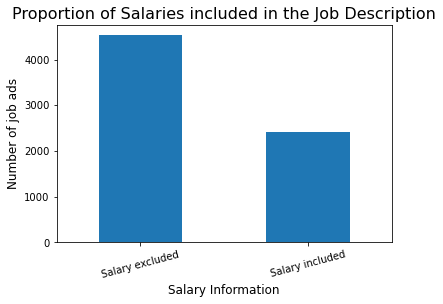

In [110]:
ax = df['description_has_salary'].value_counts().plot(kind="bar");
plt.xlabel('Salary Information', fontsize=12)
plt.ylabel('Number of job ads', fontsize=12)
plt.xticks(rotation=15)
plt.title('Proportion of Salaries included in the Job Description', fontsize=16)
ax.set_xticklabels(['Salary excluded', 'Salary included']);

In [111]:
df['location'].value_counts()

Seattle, WA             563
New York, NY            508
Cambridge, MA           487
Boston, MA              454
San Francisco, CA       425
                       ... 
New York, NY 10032        1
Chicago, IL 60613         1
Atlanta, GA 30345         1
Brooklyn, NY 11249        1
Washington, DC 20032      1
Name: location, Length: 382, dtype: int64

In [112]:
top_locations = df['location'].value_counts()
top_locations

Seattle, WA             563
New York, NY            508
Cambridge, MA           487
Boston, MA              454
San Francisco, CA       425
                       ... 
New York, NY 10032        1
Chicago, IL 60613         1
Atlanta, GA 30345         1
Brooklyn, NY 11249        1
Washington, DC 20032      1
Name: location, Length: 382, dtype: int64

In [113]:
top_locations[:5]

Seattle, WA          563
New York, NY         508
Cambridge, MA        487
Boston, MA           454
San Francisco, CA    425
Name: location, dtype: int64

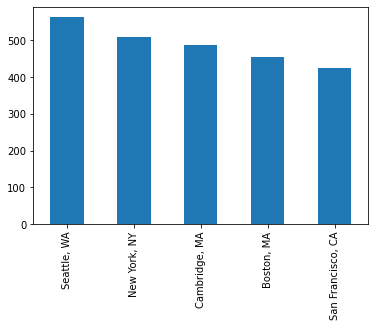

In [114]:
top_locations[:5].plot(kind="bar");

In [115]:
top_companies = df['company'].value_counts()
top_companies

Amazon.com             358
Ball Aerospace         187
Microsoft              137
Google                 134
NYU Langone Health      77
                      ... 
Kintai Therapeutics      1
HD Supply                1
US Cellular              1
Mintel                   1
TechnoGen Inc            1
Name: company, Length: 2213, dtype: int64

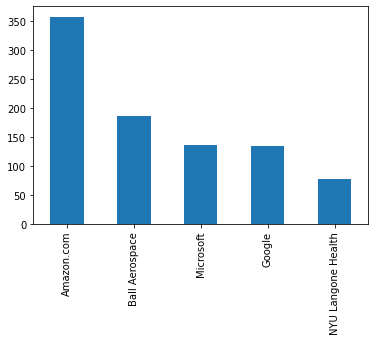

In [116]:
top_companies[:5].plot(kind="bar");

In [117]:
# identidy rows for seniority level as 'Intern', 'Junior', 'Associated', 'Internship', 'Entry-level'
lst_level = ['Intern', 'Junior', 'Associated', 'Internship', 'Entry-level', 'Entry level']
df['description_level'] = df['description'].str.contains(" | ".join(lst_level))

In [118]:
df.head()

,position,company,description,location,description_is_data_analytics,description_has_salary,description_level
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,"Atlanta, GA 30301",False,False,False
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...","Atlanta, GA",False,False,False
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta, GA",True,True,False
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA 30303",True,True,False
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta, GA",False,False,False


In [119]:
df['description_is_data_analytics'] == True

0       False
1       False
2        True
3        True
4       False
        ...  
6959    False
6960     True
6961    False
6962    False
6963     True
Name: description_is_data_analytics, Length: 6964, dtype: bool

In [120]:
(df['description_is_data_analytics']==True).sum()


2424

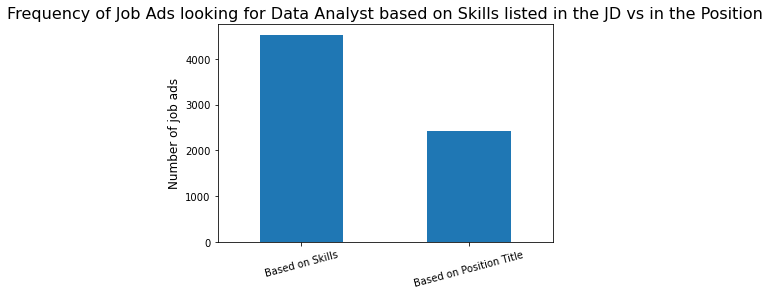

In [121]:
ax = df['description_is_data_analytics'].value_counts().plot(kind="bar");
plt.ylabel('Number of job ads', fontsize=12)
plt.xticks(rotation=15)
plt.title('Frequency of Job Ads looking for Data Analyst based on Skills listed in the JD vs in the Position', fontsize=16)
ax.set_xticklabels(['Based on Skills', 'Based on Position Title']);

In [129]:
# n. of occurrences of the top 10 locations with “Data Analyst”in position
ticks = df.groupby("location", sort=False)["position"].apply(
     lambda df: df.str.contains("Data Analyst").sum()
 ).nlargest(10).tolist()

NameError: name 'set_xticks' is not defined

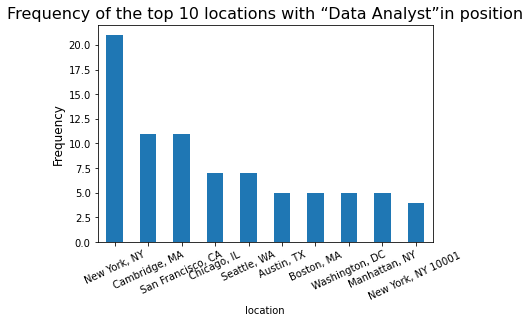

In [137]:
ax = df.groupby("location", sort=False)["position"].apply(
     lambda df: df.str.contains("Data Analyst").sum()
 ).nlargest(10).plot(kind="bar");

plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=25)
plt.title('Frequency of the top 10 locations with “Data Analyst”in position', fontsize=16)


set_xticks(self, ticks, minor=True)

ax.set_xticklabels(['Data Analyst ads'])